In [1]:
from preprocess_train_val import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn

In [2]:
print(DATA_PATH)

../data/raw/Audio/


In [3]:
os.getcwd()

'/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks'

In [5]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["Not_Firearm", "Firearms"]

Saving vectors of label - 'Firearms':   0%|          | 0/155 [00:00<?, ?it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   1%|          | 1/155 [00:00<00:21,  7.04it/s]

The number of labels (data files) is:  2


/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   2%|▏         | 3/155 [00:00<00:17,  8.66it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   3%|▎         | 5/155 [00:00<00:21,  6.93it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audiore

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  52%|█████▏    | 81/155 [00:03<00:03, 23.84it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  55%|█████▍    | 85/155 [00:03<0

Saving vectors of label - 'Not_Firearm': 100%|██████████| 1962/1962 [00:19<00:00, 101.02it/s]


In [114]:
# # Loading train set and validation set
X_train, X_val, y_train, y_val = get_train_validation()


The number of labels (data files) is:  2


In [115]:
# # Feature dimension
channels = 1
config.epochs = 50
config.batch_size = 100

num_classes = 2

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len, channels)

In [116]:
X_train.shape

(1481, 20, 11, 1)

In [117]:
X_val.shape

(636, 20, 11, 1)

In [118]:
y_train.shape

(1481,)

In [119]:
c=0
for element in y_train:
    if element==0:
        print(c)
    c+=1

6
29
33
37
50
79
113
141
157
165
172
177
189
216
223
229
238
247
263
266
268
309
341
342
358
372
384
389
420
428
430
451
460
466
484
487
517
518
519
523
541
542
546
551
555
557
581
583
595
596
597
599
601
605
608
609
621
625
627
643
649
650
657
662
676
681
687
698
750
756
757
780
782
799
829
849
860
867
893
899
907
939
953
963
987
994
1004
1012
1029
1033
1046
1048
1066
1077
1078
1105
1123
1129
1160
1167
1175
1176
1184
1205
1219
1234
1246
1268
1269
1350
1384
1396
1398
1416
1440
1463
1471


0.0


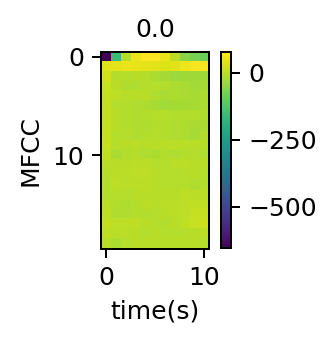

In [121]:
num=6
plt.figure(figsize=(2,2),dpi=180)
plt.imshow(X_train[num, :, :, 0])
print(y_train[num])
plt.ylabel('MFCC',fontsize=10);
plt.xlabel('time(s)');
plt.title(str(y_train[num]),fontsize=10)
plt.colorbar()
plt.tight_layout()
plt.savefig('../reports/figures/'+'MFCC_'+str(num)+'.png')

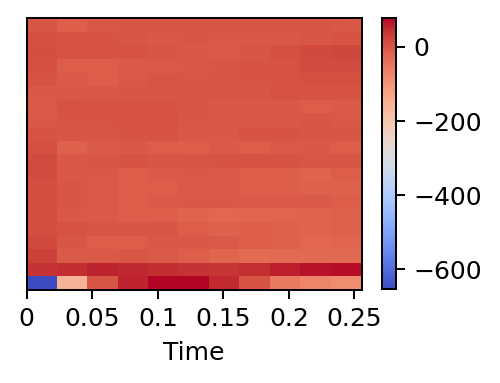

In [126]:
import librosa.display
plt.figure(figsize=(3,2),dpi=180)
librosa.display.specshow(X_train[num, :, :, 0],x_axis='time')
plt.colorbar()

In [13]:
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)

In [14]:
pd.DataFrame(y_train_hot).sum()

0     117.0
1    1364.0
dtype: float32

In [73]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=.5) #optimizer

model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 220)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 442       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [75]:
wandb.init()
history1=model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_val, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])


Epoch 1/50
47/47 [==============================] - 0s 6ms/step - loss: 250.5100 - accuracy: 0.8474 - val_loss: 282.3069 - val_accuracy: 0.7500
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 208.8667 - accuracy: 0.8521 - val_loss: 160.7469 - val_accuracy: 0.8082
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 133.0799 - accuracy: 0.8731 - val_loss: 93.1772 - val_accuracy: 0.8836
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 100.8273 - accuracy: 0.8798 - val_loss: 79.9269 - val_accuracy: 0.8884
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 120.2130 - accuracy: 0.8724 - val_loss: 75.0576 - val_accuracy: 0.9230
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 149.5689 - accuracy: 0.8650 - val_loss: 106.9112 - val_accuracy: 0.8915
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 142.0119 - accuracy: 0.8866 - val_loss: 312.3586 - val_accuracy: 0.

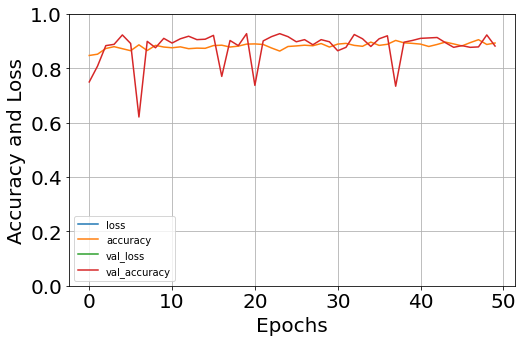

In [76]:
pd.DataFrame(history1.history).plot(figsize=(8,5),fontsize=20)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();

## Test the Sequential NN with some Test Data

In [18]:
from preprocess_test import *

In [19]:
print(DATA_PATH_TEST)

../data/raw_test/


In [20]:
get_test

<function preprocess_test.get_test(split_ratio=0.9, random_state=42)>

In [21]:
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)
labels=["Not_Firearm_test", "Firearms_test"]

Saving vectors of label - 'Not_Firearm_test':  21%|██        | 8/38 [00:00<00:00, 73.21it/s]

The number of labels is:  2


Saving vectors of label - 'Firearms_test':   0%|          | 0/37 [00:00<?, ?it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms_test':  11%|█         | 4/37 [00:00<00:01, 23.45it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms_test':  19%|█▉        | 7/37 [00:00<00:01, 24.35it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundF

In [22]:
x_non = np.load(labels[0] + '.npy')
print('The number of non firearms',len(x_non))
x_fa= np.load(labels[1] + '.npy')
print('The number of firearms',len(x_fa))

The number of non firearms 38
The number of firearms 37


In [23]:
X_test, X_none, y_test, y_none = get_test()

The number of labels is:  2


In [24]:
print(X_test.shape)
print(y_test.shape)
print(X_none.shape)
print(y_none.shape)

(67, 20, 11)
(67,)
(8, 20, 11)
(8,)


In [25]:
X_test=np.concatenate((X_test,X_none),axis=0)
Y_test=np.concatenate((y_test,y_none),axis=0)
print(X_test.shape)
print(Y_test.shape)

(75, 20, 11)
(75,)


In [26]:
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)
print(X_test.shape)

(75, 20, 11, 1)


In [27]:
Y_test_hot = to_categorical(Y_test)
print(Y_test_hot.shape)

(75, 2)


In [28]:
model.evaluate(X_test, np.abs(1-Y_test_hot))

3/3 [==============================] - 0s 1ms/step - loss: 1.1276 - accuracy: 0.8400


[1.127586841583252, 0.8399999737739563]

In [29]:
Y_predict=model.predict(X_test)

In [30]:
pd.DataFrame(Y_predict.round())

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
70,0.0,1.0
71,0.0,1.0
72,1.0,0.0
73,0.0,1.0


In [40]:
pd.DataFrame(Y_predict.round()).sum()

0    31.0
1    44.0
dtype: float32

In [31]:
pd.DataFrame(Y_test_hot).sum()

0    38.0
1    37.0
dtype: float32

In [35]:
pd.DataFrame(y_train_hot).sum()

0     117.0
1    1364.0
dtype: float32

In [39]:
Y_test_hot[:,0:1].sum()

38.0

In [107]:
Y_test_hot[:,0]

array([0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1.], dtype=float32)

In the 0th column, ones represent not a firearm, and zeros represent a firearm. 

In [106]:
Y_test_hot[:,1]

array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [108]:
Y_test_hot[:,1].sum()

37.0

In the 1st column, ones represent a firearm sound, and the zeros represent a non firearm sound. I shall use this, as it will be easier to understand. 

In [109]:
import sklearn
conf_mat1=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[1],pd.DataFrame(Y_predict).round()[1])

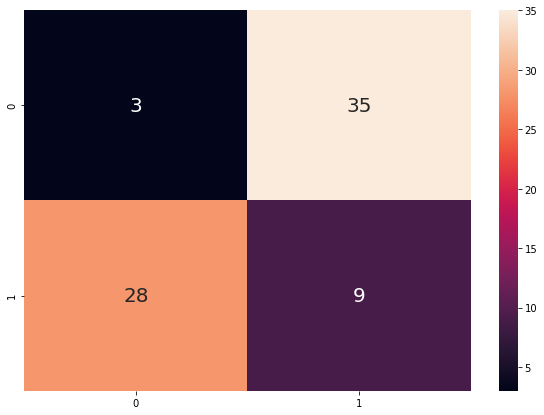

In [47]:
import seaborn as sn 

df_cm = pd.DataFrame(conf_mat1, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})

In binary classification, the count of true negatives is , false negatives is , true positives is and false positives is .

The element, c 0,0 , is equal to 3. This indicates that there are 3 true negative. truly not firearms
The element, c 1,0 , is equal to 28. This indicates that there are 28 false negative. 
The element, c 0,1 , is equal to 35. This indicates that there are 35 false positives.
The element, c 1,1 , is equal to 9. Thus, there are 9 true positives.
In the context of predicting firearms, the presence of false negatives is grave. This means that the 4 sounds were actually the sounds of firearms, but it was predicted that they were not.

## Adding Convolution 

In [96]:
#input_shape=(batch_size, channels, rows, cols)
input_shape=(20,11,1)

model2 = Sequential()
model2.add(Conv2D(32,(2,2),
                 input_shape=input_shape,
                 activation='relu',
                 data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

opt2 = keras.optimizers.Adam(learning_rate=0.005)

model2.compile(loss="categorical_crossentropy",
              optimizer=opt2,
              metrics=['accuracy'])

In [97]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 19, 10, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               184448    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 184,866
Trainable params: 184,866
Non-trainable params: 0
_________________________________________________________________


In [98]:
print(X_train.shape)
print(np.reshape(X_train,(1481,20,11,1)).shape)
X_train2=np.reshape(X_train,(1481,20,11,1))
print(y_train_hot.shape)
print(X_val.shape)
X_val2=np.reshape(X_val,(636,20,11,1))
print(X_val2.shape)
print(y_val_hot.shape)
print(config.buckets)
print(config.max_len)
print(channels)

(1481, 20, 11)
(1481, 20, 11, 1)
(1481, 2)
(636, 20, 11)
(636, 20, 11, 1)
(636, 2)
20
11
1


In [99]:
wandb.init()
history=model2.fit(X_train2, y_train_hot, epochs=config.epochs, validation_data=(X_val2, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Epoch 1/50
47/47 [==============================] - 0s 8ms/step - loss: 2.9730 - accuracy: 0.9061 - val_loss: 0.4489 - val_accuracy: 0.8774
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.2746 - accuracy: 0.9379 - val_loss: 0.3075 - val_accuracy: 0.9198
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.1194 - accuracy: 0.9622 - val_loss: 0.1047 - val_accuracy: 0.9638
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.9473 - val_loss: 0.1866 - val_accuracy: 0.9733
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.1255 - accuracy: 0.9629 - val_loss: 0.1133 - val_accuracy: 0.9638
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0734 - accuracy: 0.9676 - val_loss: 0.1126 - val_accuracy: 0.9638
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0697 - accuracy: 0.9662 - val_loss: 0.1140 - val_accuracy: 0.9638
Epoch 8/50
47/47 [==

In [100]:
model2.evaluate(X_test, np.abs(1-Y_test_hot))

3/3 [==============================] - 0s 1ms/step - loss: 0.8313 - accuracy: 0.9200


[0.8312568068504333, 0.9200000166893005]

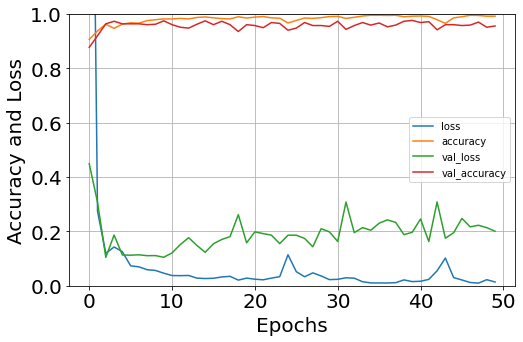

<Figure size 432x288 with 0 Axes>

In [101]:
pd.DataFrame(history.history).plot(figsize=(8,5),fontsize=20)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();
plt.savefig('CNN_01_std')

In [102]:
import pickle
models_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/models/'
filename = 'cnn_model.h5'
cnn_model = models_path+filename

print(cnn_model)
model2.save(cnn_model)

#pickle.dump(model2, open(models_path+filename, 'wb'))

/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/models/cnn_model.h5


In [110]:
Y_predict2=model2.predict(X_test)

In [111]:
conf_mat2=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[1],pd.DataFrame(Y_predict2).round()[1])

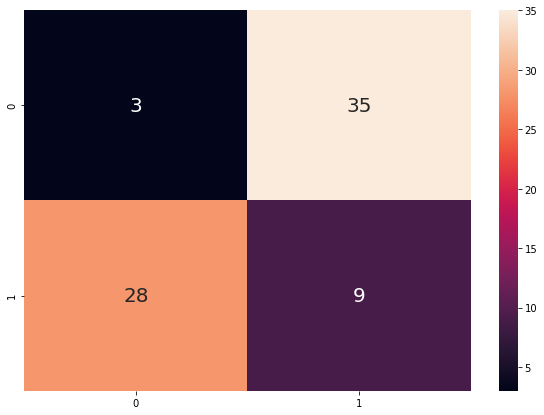

In [112]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})